Epoch 0, Loss: 0.0673
Epoch 5, Loss: 0.0267
Epoch 10, Loss: 0.0253
Epoch 15, Loss: 0.0192
Epoch 20, Loss: 0.0158
Epoch 25, Loss: 0.0101
Epoch 30, Loss: 0.0048
Epoch 35, Loss: 0.0010
Epoch 40, Loss: 0.0015
Epoch 45, Loss: 0.0010
Epoch 50, Loss: 0.0002
Epoch 55, Loss: 0.0004

Metrics:
Close >> RMSE: $ 9.3873 R2: 0.8994 MAE: $ 7.9172


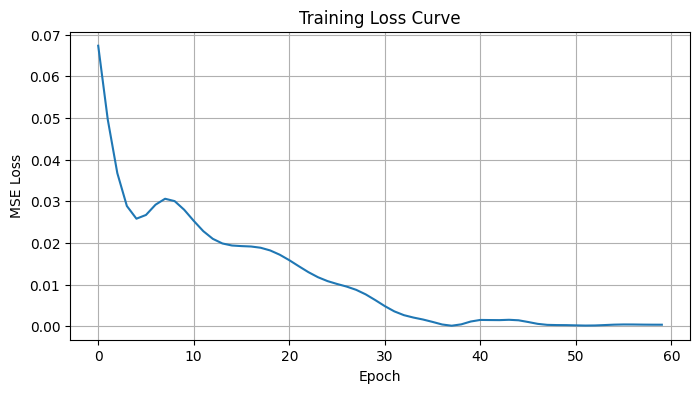

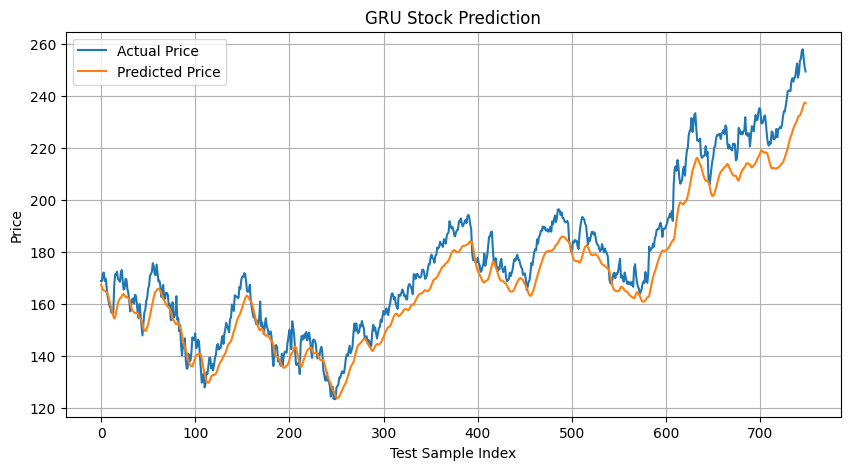

In [19]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("AAPL_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0514
Epoch 5, Loss: 0.0284
Epoch 10, Loss: 0.0229
Epoch 15, Loss: 0.0185
Epoch 20, Loss: 0.0120
Epoch 25, Loss: 0.0060
Epoch 30, Loss: 0.0008
Epoch 35, Loss: 0.0025
Epoch 40, Loss: 0.0005
Epoch 45, Loss: 0.0004
Epoch 50, Loss: 0.0006
Epoch 55, Loss: 0.0002

Metrics:
Close >> RMSE: $ 4.3410 R2: 0.9747 MAE: $ 3.3508


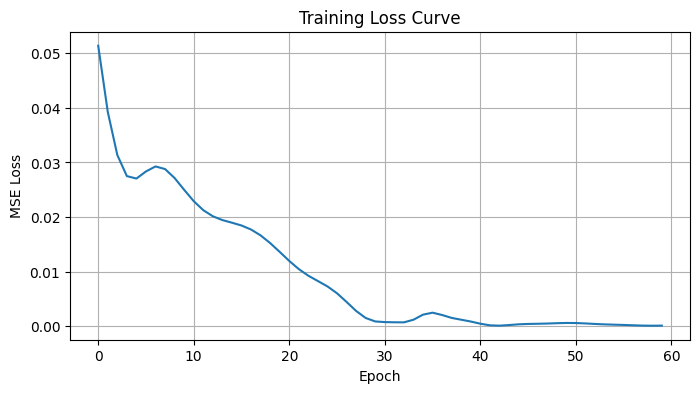

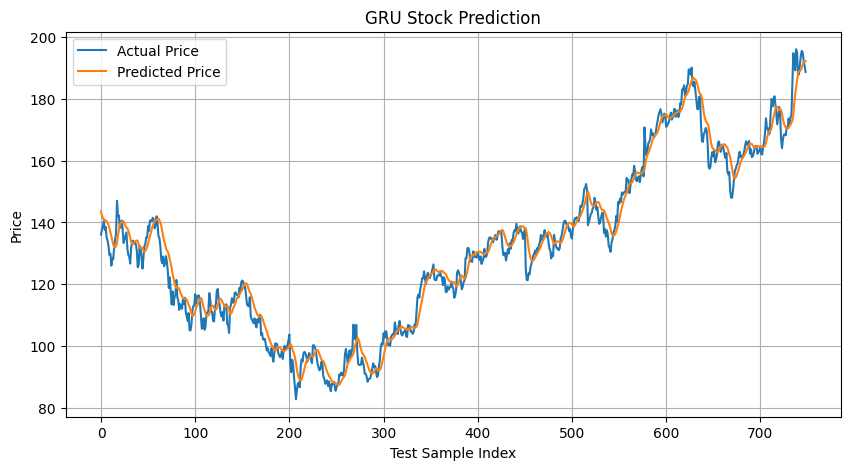

In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("GOOGL_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0717
Epoch 5, Loss: 0.0157
Epoch 10, Loss: 0.0217
Epoch 15, Loss: 0.0136
Epoch 20, Loss: 0.0143
Epoch 25, Loss: 0.0114
Epoch 30, Loss: 0.0095
Epoch 35, Loss: 0.0072
Epoch 40, Loss: 0.0045
Epoch 45, Loss: 0.0015
Epoch 50, Loss: 0.0002
Epoch 55, Loss: 0.0009

Metrics:
Close >> RMSE: $ 15.2737 R2: 0.9900 MAE: $ 11.0043


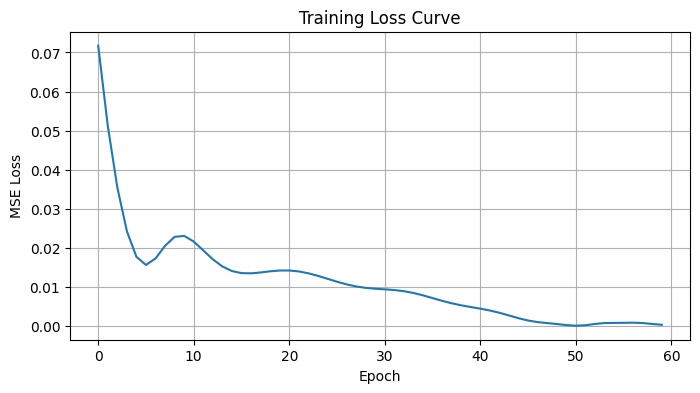

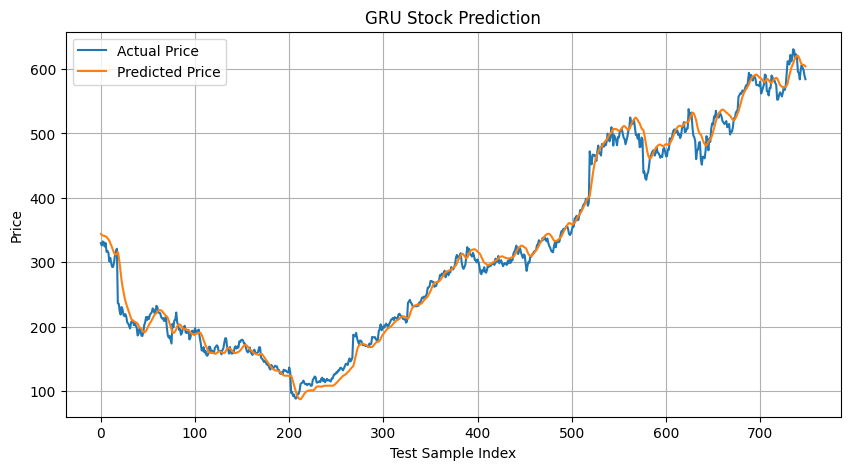

In [21]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("META_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0155
Epoch 5, Loss: 0.0055
Epoch 10, Loss: 0.0019
Epoch 15, Loss: 0.0029
Epoch 20, Loss: 0.0018
Epoch 25, Loss: 0.0021
Epoch 30, Loss: 0.0017
Epoch 35, Loss: 0.0017
Epoch 40, Loss: 0.0015
Epoch 45, Loss: 0.0014
Epoch 50, Loss: 0.0013
Epoch 55, Loss: 0.0011

Metrics:
Close >> RMSE: $ 43.1886 R2: -0.0468 MAE: $ 32.0700


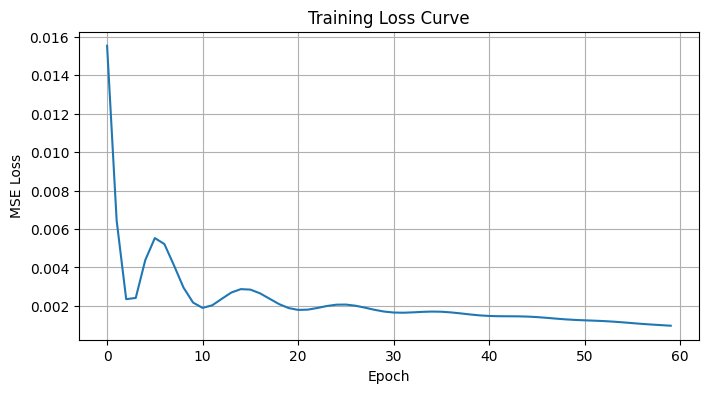

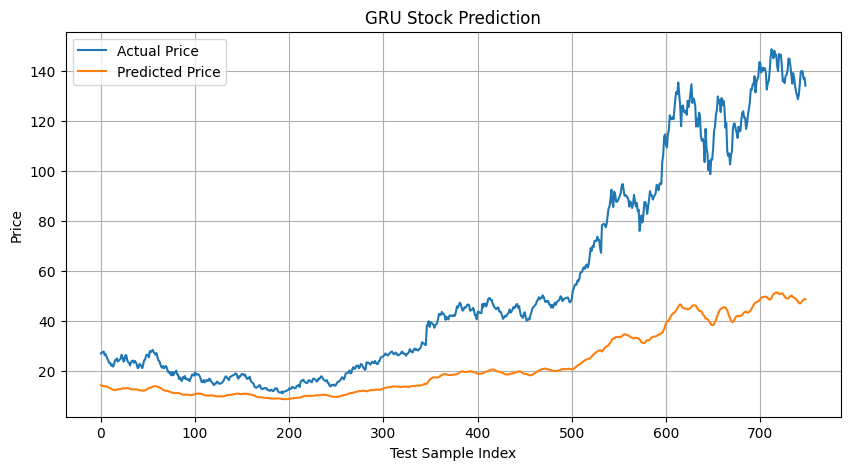

In [22]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("NVDA_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.1482
Epoch 5, Loss: 0.0449
Epoch 10, Loss: 0.0521
Epoch 15, Loss: 0.0344
Epoch 20, Loss: 0.0306
Epoch 25, Loss: 0.0238
Epoch 30, Loss: 0.0154
Epoch 35, Loss: 0.0085
Epoch 40, Loss: 0.0021
Epoch 45, Loss: 0.0009
Epoch 50, Loss: 0.0018
Epoch 55, Loss: 0.0003

Metrics:
Close >> RMSE: $ 6.0533 R2: 0.9705 MAE: $ 4.6620


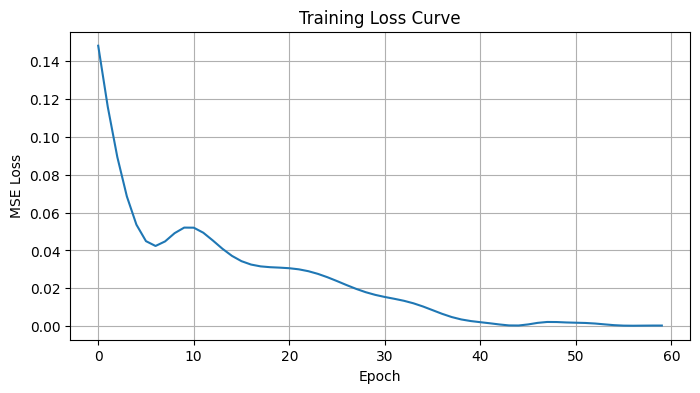

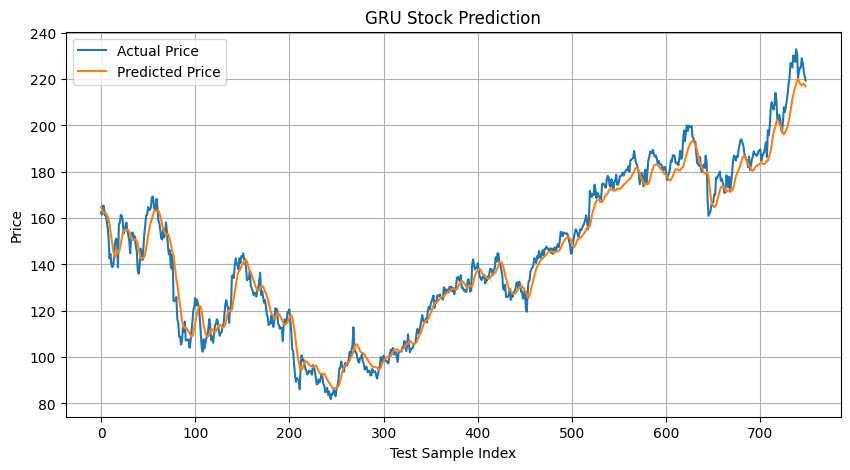

In [23]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("AMZN_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0105
Epoch 5, Loss: 0.0078
Epoch 10, Loss: 0.0070
Epoch 15, Loss: 0.0060
Epoch 20, Loss: 0.0047
Epoch 25, Loss: 0.0029
Epoch 30, Loss: 0.0008
Epoch 35, Loss: 0.0003
Epoch 40, Loss: 0.0005
Epoch 45, Loss: 0.0001
Epoch 50, Loss: 0.0002
Epoch 55, Loss: 0.0002

Metrics:
Close >> RMSE: $ 4.1021 R2: 0.9836 MAE: $ 2.8443


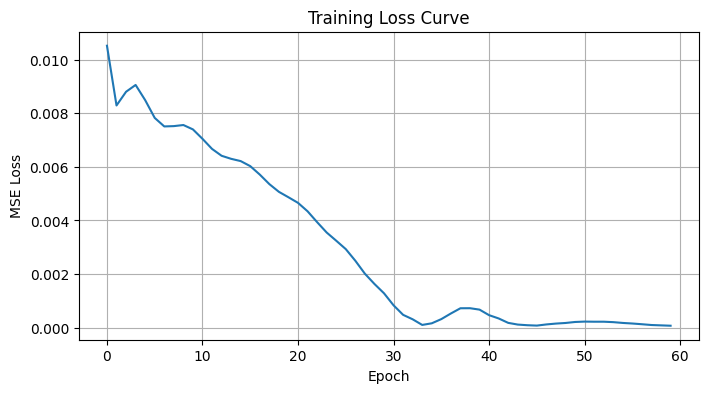

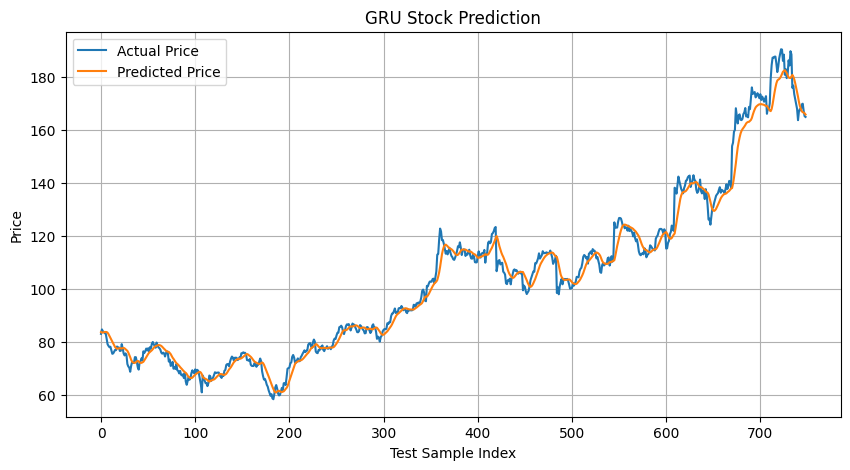

In [24]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("ORCL_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0457
Epoch 5, Loss: 0.0335
Epoch 10, Loss: 0.0249
Epoch 15, Loss: 0.0166
Epoch 20, Loss: 0.0072
Epoch 25, Loss: 0.0004
Epoch 30, Loss: 0.0033
Epoch 35, Loss: 0.0004
Epoch 40, Loss: 0.0007
Epoch 45, Loss: 0.0008
Epoch 50, Loss: 0.0003
Epoch 55, Loss: 0.0003

Metrics:
Close >> RMSE: $ 19.8412 R2: 0.8923 MAE: $ 16.2539


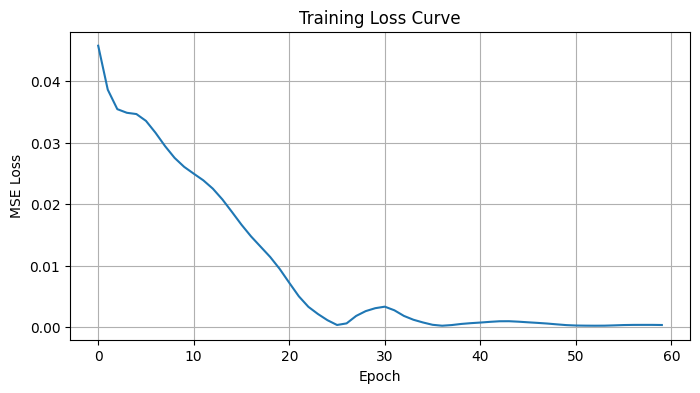

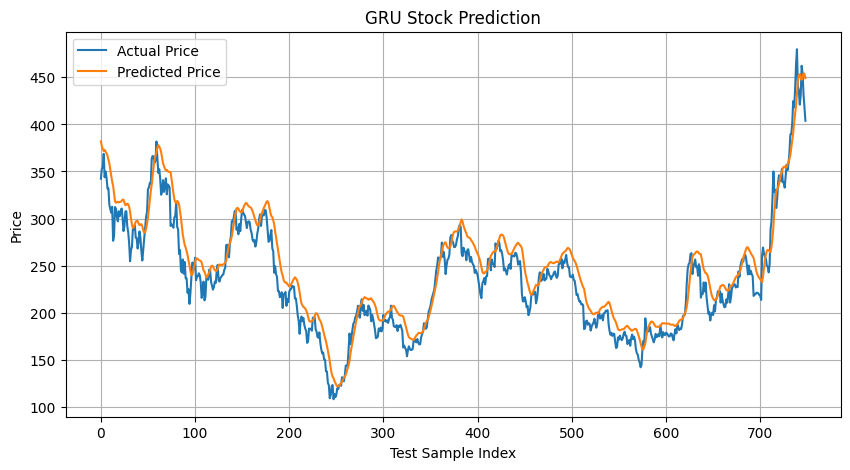

In [25]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("TSLA_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 20    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Epoch 0, Loss: 0.0510
Epoch 5, Loss: 0.0075
Epoch 10, Loss: 0.0118
Epoch 15, Loss: 0.0066
Epoch 20, Loss: 0.0079
Epoch 25, Loss: 0.0065
Epoch 30, Loss: 0.0059
Epoch 35, Loss: 0.0058
Epoch 40, Loss: 0.0050
Epoch 45, Loss: 0.0047
Epoch 50, Loss: 0.0039
Epoch 55, Loss: 0.0032

Metrics:
Close >> RMSE: $ 26.9468 R2: -3.3005 MAE: $ 25.8894


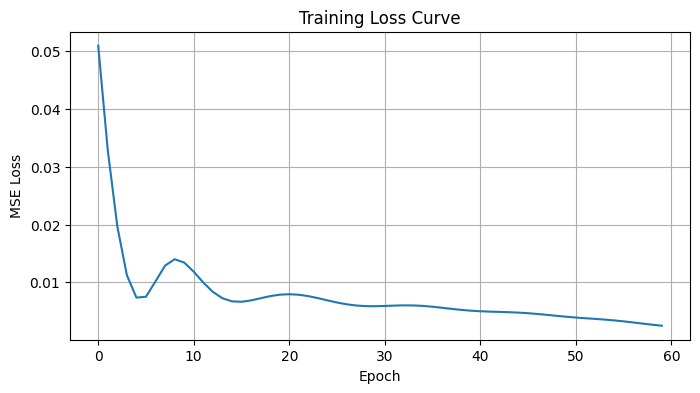

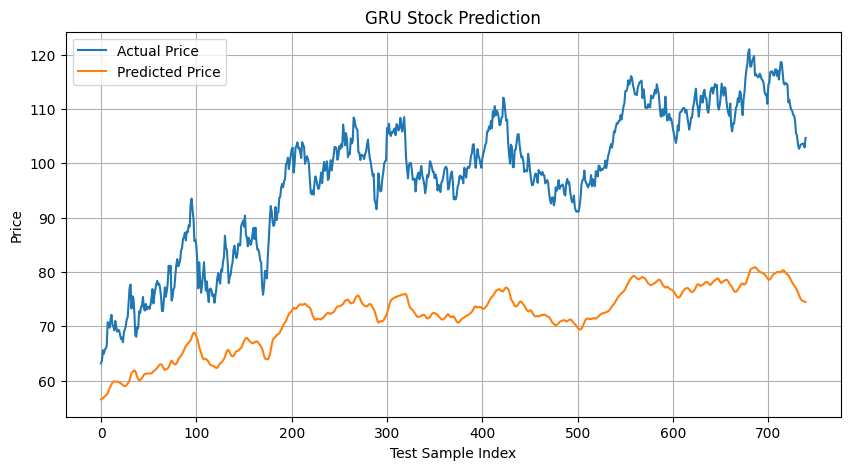

In [27]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

########
df = pd.read_csv("XOM_processed.csv")
prices = df["Close"].values.reshape(-1, 1)

scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

########
SEQ_LEN = 50    #Changing this changes dimension(???), makes it fast but drops accuracy
X_list, y_list = [], []

for i in range(len(prices_scaled) - SEQ_LEN):
    X_list.append(prices_scaled[i:i+SEQ_LEN])
    y_list.append(prices_scaled[i+SEQ_LEN])

X = torch.tensor(np.array(X_list), dtype=torch.float32)
y = torch.tensor(np.array(y_list), dtype=torch.float32)

########
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

########
GRU = nn.GRU(1, 64, 2, batch_first=True)
connection_density = nn.Linear(64, 1)

criterion = nn.MSELoss()
#Adam, AdamW, RMSprop, Adamax, SGD... << optimizers
optimizer = torch.optim.AdamW(list(GRU.parameters()) + list(connection_density.parameters()), lr=0.00095) #Need to know about learning rate. What's the best for stock pred?

########
EPOCHS = 60  # More leads to overfitting and less -> underfit
losses = []

for epoch in range(EPOCHS):
    GRU.train()
    connection_density.train()

    optimizer.zero_grad()

    out, _ = GRU(X_train)
    preds = connection_density(out[:, -1, :])

    loss = criterion(preds, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

########
GRU.eval()
connection_density.eval()

out_test, _ = GRU(X_test)
pred_test = connection_density(out_test[:, -1, :]).detach().numpy()

pred_test = scaler.inverse_transform(pred_test)
actual_test = scaler.inverse_transform(y_test.numpy())

mse1 = mean_squared_error(actual_test, pred_test)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(actual_test, pred_test)
mae1 = mean_absolute_error(actual_test, pred_test)

print("\nMetrics:")
print("Close >> RMSE: $", "%.4f" % rmse1, "R2:", "%.4f" % r2_1, "MAE: $", "%.4f" % mae1)

########
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(actual_test, label="Actual Price")
plt.plot(pred_test, label="Predicted Price")
plt.title("GRU Stock Prediction")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
